In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [264]:
data_file=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

### Performing Explotary Data Analysis

#### In this project, I will use classification techniques for supervised learning to predict whether an arbitrary passenger on the Titanic would survive the sinking or not.

In [265]:
data_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
data_file.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [267]:
data_file.shape

(891, 12)

- ###### This dataset Containes 891 rows and 12 columns
- ###### The columns name are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked 



In [268]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### From above we can notice that
- The columns passengerId, Survived, pclass, sibSp, Parch have an int datatype
- The columns Name, Sex, Ticket, Cabin and Embarked have an object datatype
- The columns Age and Fare have an float datatype
- There are null values present in Age, cabin and embarked columns 

In [269]:
#Set passengerId as a index columns
data_file.set_index('PassengerId',inplace=True)

In [270]:
data_file.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
#Checking duplicate values
data_file.duplicated().sum()

0

In [272]:
#showing null values
data_file.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- In Age column 177 null values present 
- In Cabin column 687 null values present
- In Embarked column 2 null values present 

##### Adjusting NaN Values Columns by using Simple Imputer

In [273]:
#Droping column 
data_file.drop(['Name','Ticket','Cabin'], axis=1,inplace=True)

In [274]:
# Filling  Null values by using simple imputer 
from sklearn.impute import SimpleImputer

#using mean for integer value
age_column = data_file[['Age']]  # Extracting the column as a DataFrame (2D)

# Initialize SimpleImputer
imputer1 = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the selected column
age_imputed = imputer1.fit_transform(age_column)

# Replace the original column in the dataset with the imputed values
data_file['Age'] = age_imputed

In [275]:
#using mode for string values 
embarked_column = data_file[['Embarked']]  # Extracting the column as a DataFrame (2D)

# Initialize SimpleImputer with 'most_frequent' strategy for string values
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected column
embarked_imputed = imputer.fit_transform(embarked_column)

# Flatten the 2D array to convert it into a 1D array
embarked_imputed = embarked_imputed.flatten()

# Replace the original column in the dataset with the imputed values
data_file['Embarked'] = embarked_imputed

In [276]:
data_file.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [277]:
#Showing count of unique values of each columns  
for values in data_file.columns:
    print(values,'=>',data_file[values].nunique())
    print('-'*50)

Survived => 2
--------------------------------------------------
Pclass => 3
--------------------------------------------------
Sex => 2
--------------------------------------------------
Age => 89
--------------------------------------------------
SibSp => 7
--------------------------------------------------
Parch => 7
--------------------------------------------------
Fare => 248
--------------------------------------------------
Embarked => 3
--------------------------------------------------


In [278]:
#Showing Unique values in each columns
for values in data_file.columns:
    print(values,'=>',data_file[values].unique())
    print('-'*60)

Survived => [0 1]
------------------------------------------------------------
Pclass => [3 1 2]
------------------------------------------------------------
Sex => ['male' 'female']
------------------------------------------------------------
Age => [22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.     

### Visualization

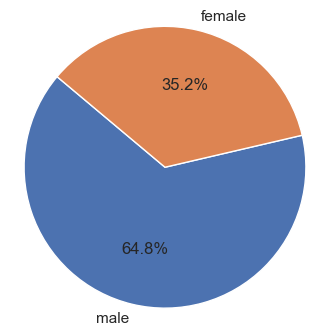

In [279]:
sex_counts = data_file['Sex'].value_counts()
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

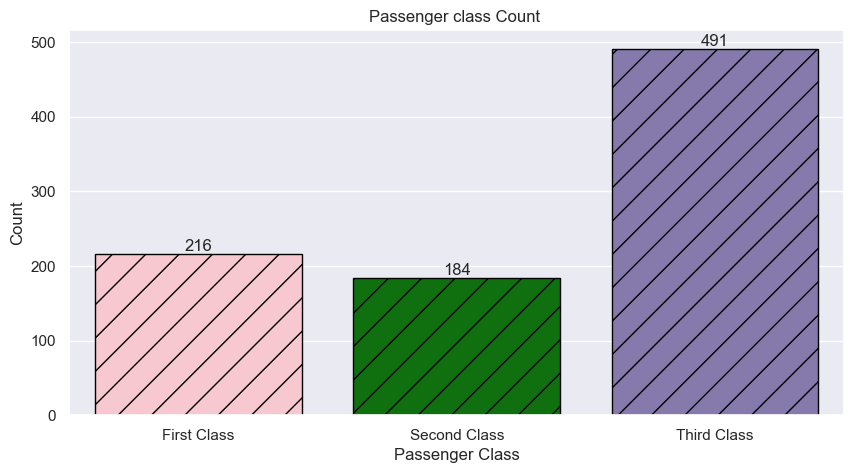

In [280]:
# Define custom color palette
custom_palette = ['pink','green','m']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Pclass',data=data_file,palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel("Passenger Class")  # Set x-axis label
ax.set_ylabel("Count")  # Set y-axis label  
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set_title('Passenger class Count ') 
# Changing the hatch pattern
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color


Text(0.5, 1.0, 'Passenger Class Analysis: Male vs Female')

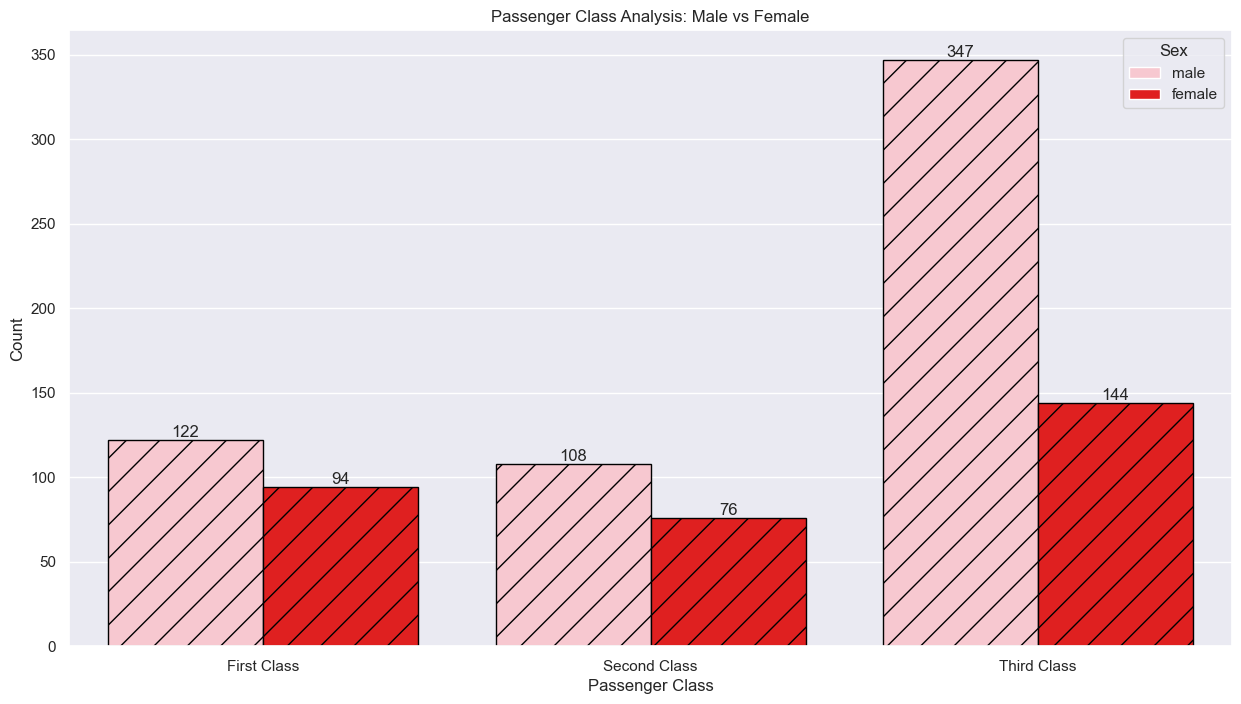

In [281]:
# Define custom color palette
custom_palette = ['pink','red']  
sns.set(rc={'figure.figsize':(15,8)}) 

ax=sns.countplot(x="Pclass",data=data_file,hue='Sex',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

# Set x-axis tick labels
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set_xlabel("Passenger Class")  # Set x-axis label
ax.set_ylabel("Count")  # Set y-axis label

# Changing the hatch pattern
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
# Set the title of the graph
ax.set_title('Passenger Class Analysis: Male vs Female') 

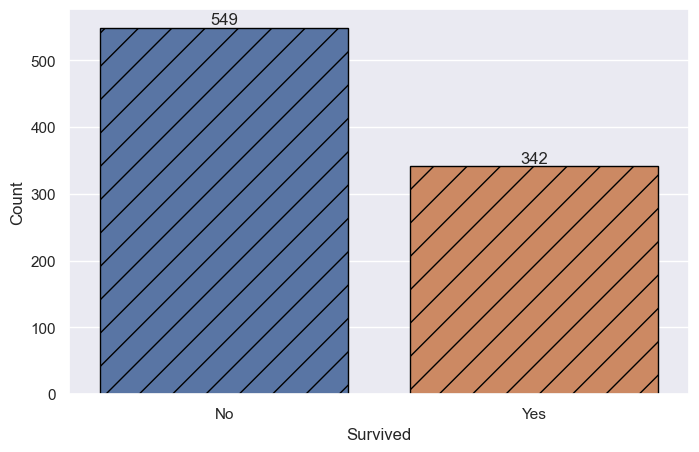

In [282]:
sns.set(rc={'figure.figsize':(8,5)})
ax=sns.countplot(x='Survived',data=data_file)
for bars in ax.containers:
    ax.bar_label(bars)
    
# Set x-axis and y-axis labels
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

# Set x-axis tick labels
ax.set_xticklabels(['No', 'Yes'])  
for bar in ax.patches:
    bar.set_hatch('/')  
    bar.set_edgecolor('black')  

Text(0.5, 1.0, 'Survival Analysis: Male vs Female')

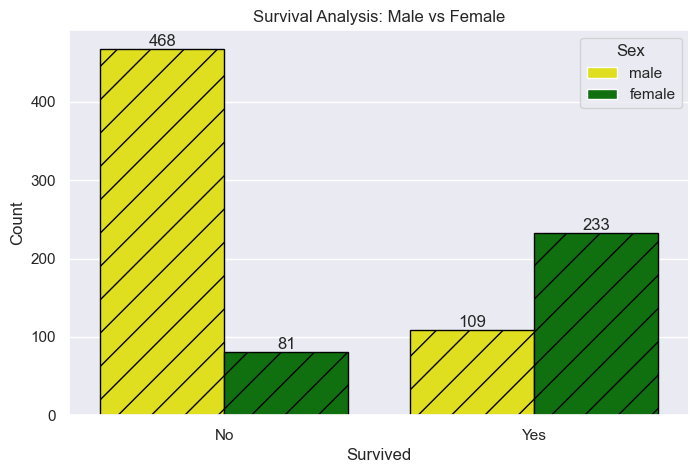

In [283]:
# Define custom color palette
custom_palette = ['yellow','green']  
sns.set(rc={'figure.figsize':(8,5)}) 

ax=sns.countplot(x='Survived',data=data_file,hue='Sex',palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
    
# Set x-axis and y-axis labels
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
# Set x-axis tick labels
ax.set_xticklabels(['No', 'Yes']) 

for bar in ax.patches:
    bar.set_hatch('/')  
    bar.set_edgecolor('black') 
# Set the title of the graph
ax.set_title('Survival Analysis: Male vs Female')  

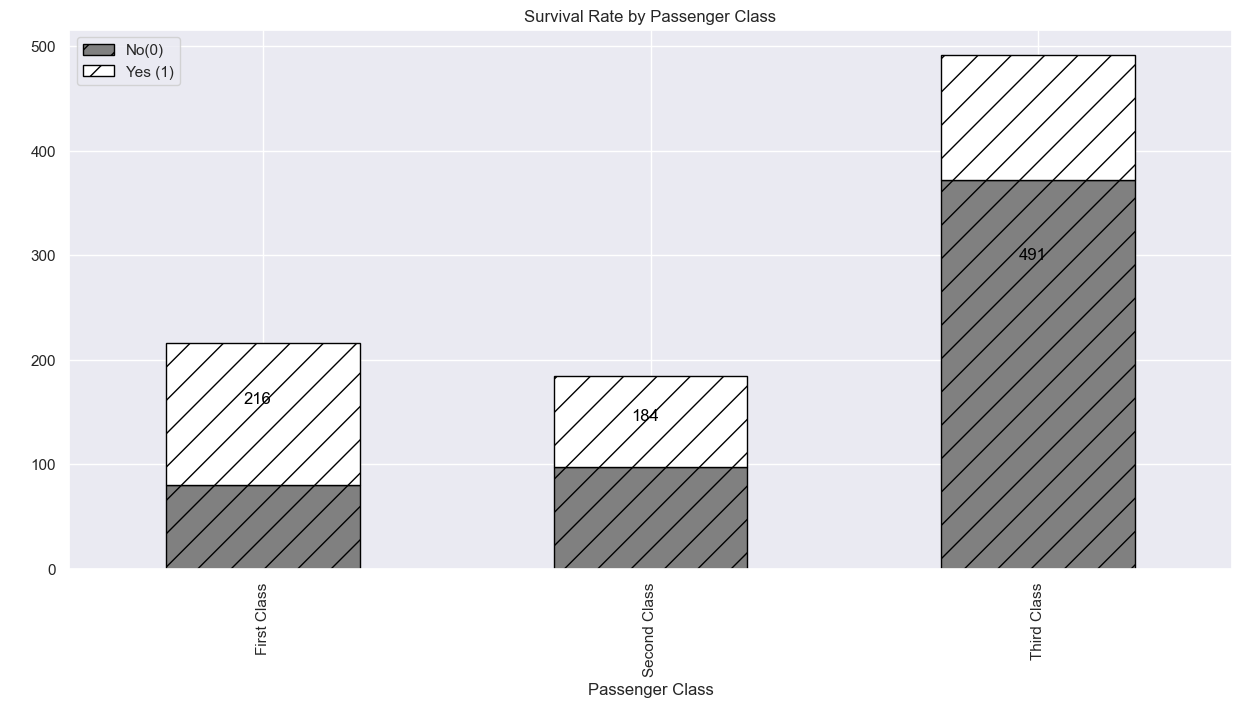

In [284]:
# Grouping the data and plotting
ax = data_file.groupby("Pclass")["Survived"] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, figsize=(15, 7), color=['Grey', 'white'])

# Adding text labels for each bar
for i, v in enumerate(data_file.groupby('Pclass').agg({'Survived': lambda x: len(x)})['Survived']):
    plt.text(i-0.05, v/2+50, int(v), color='black')

# Setting the title and labels
plt.title('Survival Rate by Passenger Class')
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set_xlabel("Passenger Class")
ax.set_ylabel(" ")

# Changing the hatch pattern and edge color
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color

# Add legend with labels
ax.legend(labels=['No(0)', 'Yes (1)'])

plt.show()

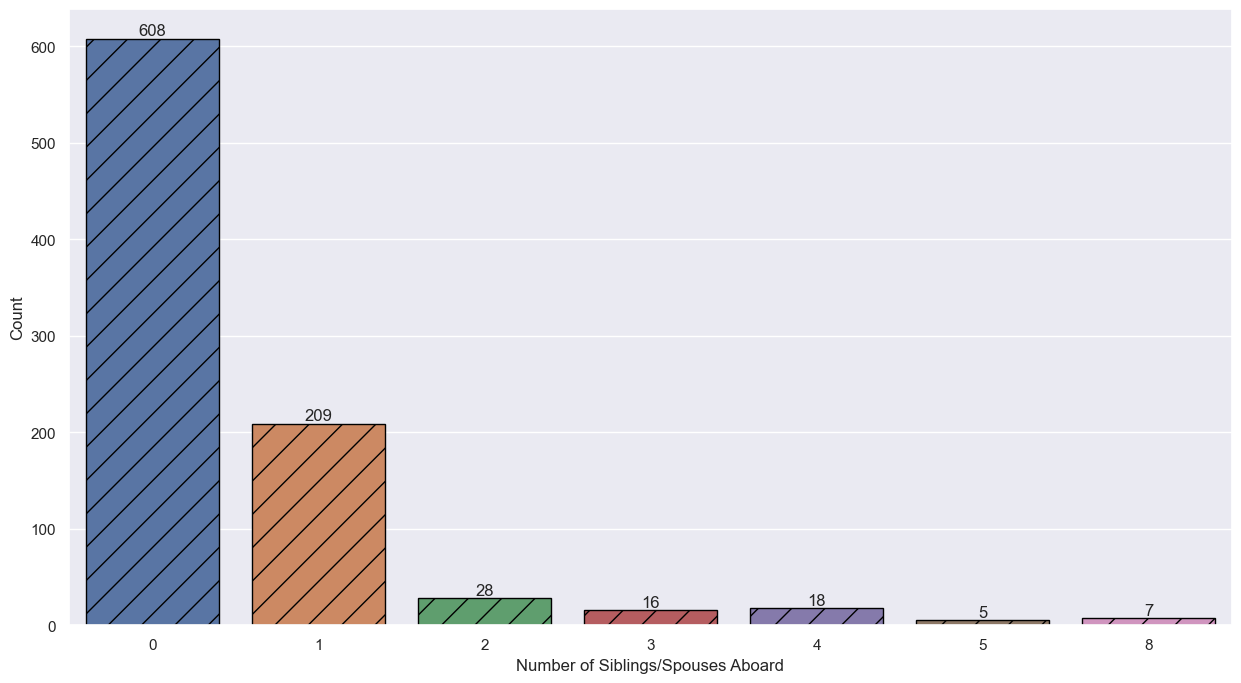

In [285]:
# Set the figure size before creating the plot
sns.set(rc={'figure.figsize':(15,8)})

# Create the count plot
ax = sns.countplot(x='SibSp', data=data_file)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Set x-axis and y-axis labels
ax.set_xlabel("Number of Siblings/Spouses Aboard")  # Set x-axis label
ax.set_ylabel("Count")  # Set y-axis label

# Changing the hatch pattern and edge color of the bars
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color

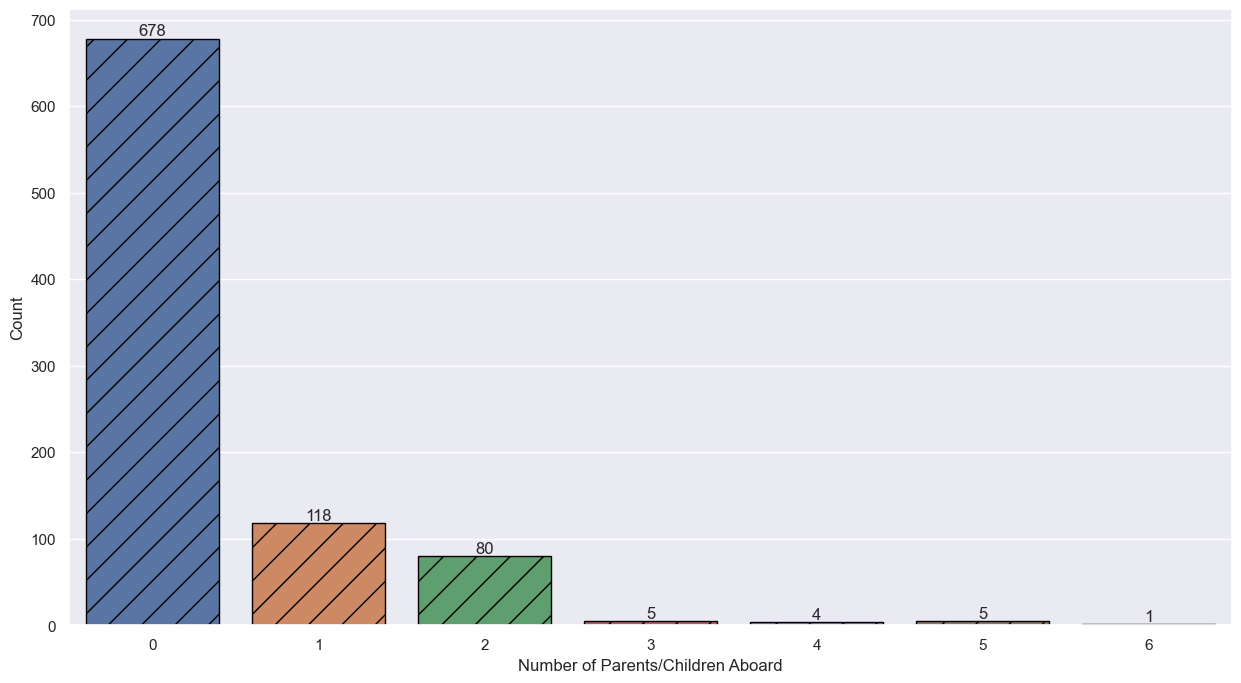

In [286]:
# Set the figure size before creating the plot
sns.set(rc={'figure.figsize':(15,8)})

# Create the count plot
ax = sns.countplot(x='Parch', data=data_file)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Set x-axis and y-axis labels
ax.set_xlabel("Number of Parents/Children Aboard")  # Set x-axis label
ax.set_ylabel("Count")  # Set y-axis label

# Changing the hatch pattern and edge color of the bars
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color

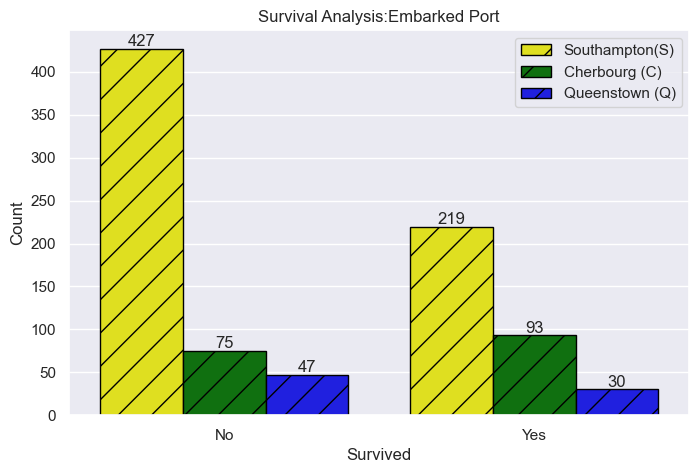

In [287]:
# Define custom color palette
custom_palette = ['yellow','green','Blue']  
sns.set(rc={'figure.figsize':(8,5)}) 

ax=sns.countplot(x='Survived',data=data_file,hue='Embarked',palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
    
# Set x-axis and y-axis labels
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

# Set x-axis tick labels
ax.set_xticklabels(['No', 'Yes'])  
for bar in ax.patches:
    bar.set_hatch('/')  
    bar.set_edgecolor('black') 
# Set the title of the graph
ax.set_title('Survival Analysis:Embarked Port')
# Add legend with labels
ax.legend(labels=['Southampton(S)','Cherbourg (C)', 'Queenstown (Q)'])

##### From above Graphs we can summerized that below points 
###### 1. Gender Distribution:
- The percentage of male travelers in the Titanic dataset is higher compared to female travelers.
###### 2. Passenger Class Distribution:
- The dataset indicates a higher count of third-class passengers compared to the second and first classes.
- Across all classes, male passengers outnumbered females.
###### 3. Survival Statistics:
- In the Titanic dataset, there were 468 male and 233 female passengers who survived, while 109 male and 81 female passengers did not survive.
- The number of male passengers who did not survive surpasses that of females, indicating a higher ratio of non-survivors compared to survivors, particularly among males.
###### 4. Survival by Passenger Class:
- First-class female passengers survived more compared to all other passenger classes.
- The majority of Titanic passengers had no siblings or spouses aboard
###### 5. Survival by Embarked Location:
- The survival rate was highest for passengers embarked in Southampton, followed by Cherbourg, and lastly, Queenstown.

### Performing Encoding

In [288]:
#importing Encoder label incoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['Sex','Embarked']
for column in list:
    data_file[column]=labelencoder.fit_transform(data_file[column])

- We performing encoder for transforming string values into integer

In [289]:
#### Checking Correlation 

In [290]:
corr_matrix=data_file.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


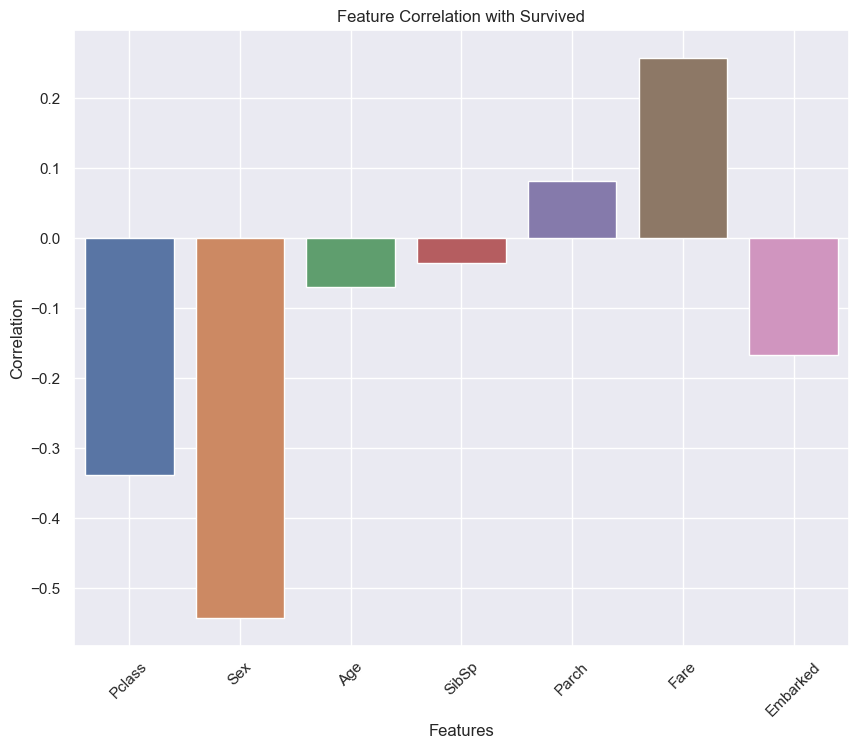

In [291]:
# Plot correlation with target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_matrix['Survived'].drop('Survived').index, y=corr_matrix['Survived'].drop('Survived').values)
plt.title("Feature Correlation with Survived")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### From above Graph we can observed that 
##### - Negative Correlation:
 The features Pclass, Sex, Age, SibSp (number of siblings/spouses aboard), and Embarked exhibit a negative correlation with the label variable "Survived". This implies that passengers with lower class, males, older individuals, those with more siblings/spouses aboard, and those embarked from certain locations had lower chances of survival.

##### - Positive Correlation:
On the other hand, the features Parch (number of parents/children aboard) and Fare show a positive correlation with the label variable "Survived". This indicates that passengers with more family members (parents/children) aboard and those who paid higher fares had higher chances of survival.

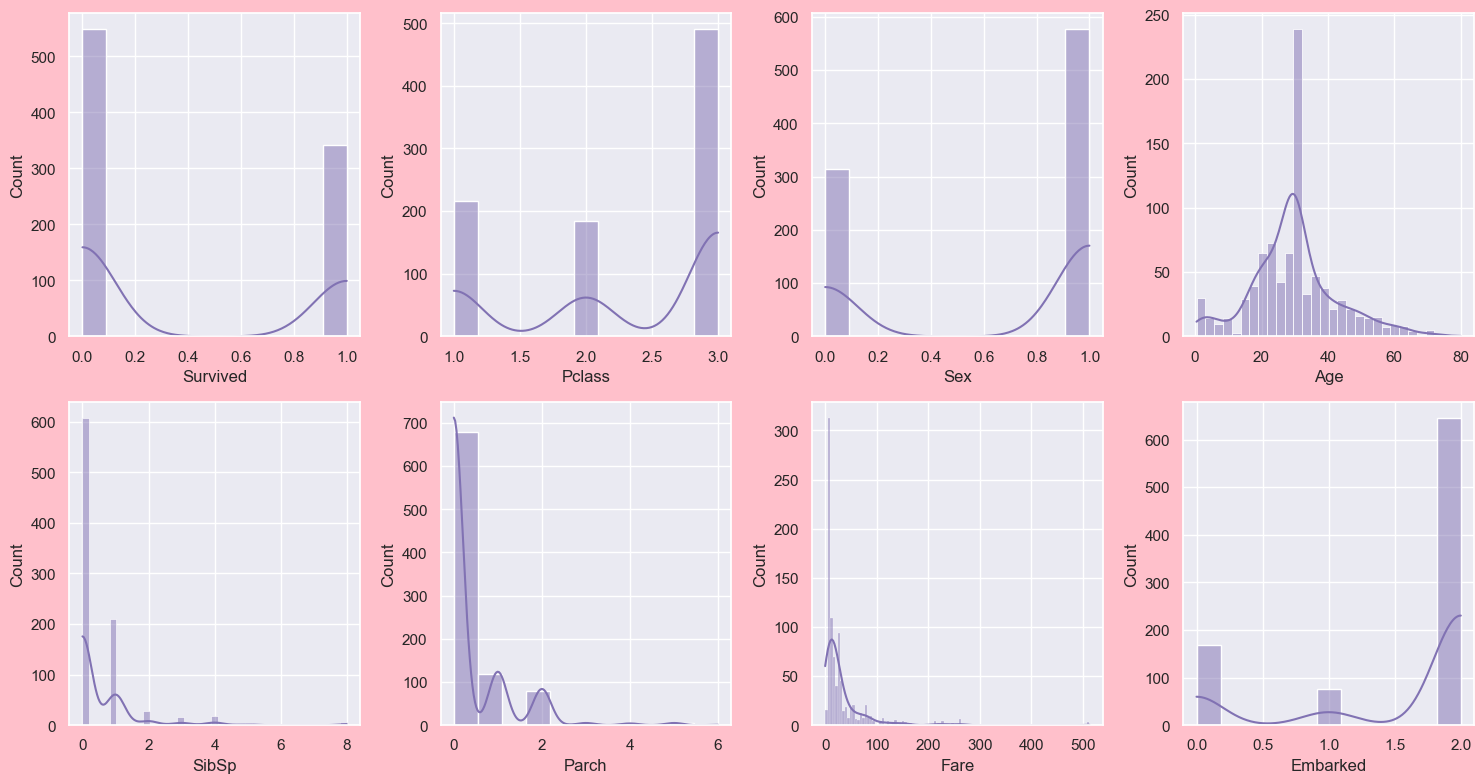

In [292]:
def plot_histograms(data):
    fig, axes = plt.subplots(2,4, figsize=(15, 8), facecolor='pink')
    axes = axes.flatten()
    
    for i, feature in enumerate(data.columns[:12]):
        ax = axes[i]
        sns.histplot(data[feature], color='m',kde=True,ax=ax)
        ax.set_label(feature)
    
    plt.tight_layout()
    plt.show()

# Call the function with the dataset
plot_histograms(data_file)

##### From the above distribution plot we can notice that the data almost looks normal in all columns except Parch and Fare  

### Splitting the data into training and test

In [293]:
x=data_file.iloc[:,1:]
y=data_file.iloc[:,0]
print('Feature Dimension',x.shape)
print('Label Dimension',y.shape)

Feature Dimension (891, 7)
Label Dimension (891,)


### Feature scaling using MinMaxScaler

In [294]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scale = MinMaxScaler()

# Fit the scaler to your data and transform it
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
888,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


We have scaled the data using MinMax scalarization method  overcome the issue of biasness

#### Model Selection

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [297]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.8544776119402985 On Random State=> 129


In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### LogisticRegression

In [299]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.8544776119402985
Confusion Matrix:- [[136  15]
 [ 24  93]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.90      0.87       151
           1       0.86      0.79      0.83       117

    accuracy                           0.85       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------------------


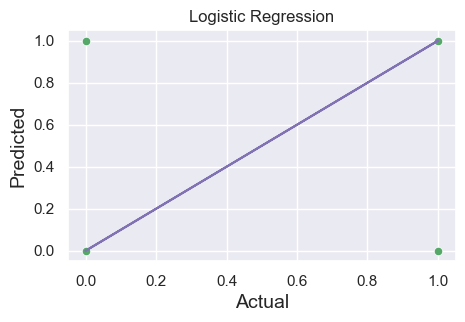

In [300]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_lg,y=y_test,color='g')
plt.plot(pred_lg,pred_lg,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=12)
plt.show()

#### ExtraTreesClassifier

In [301]:
etc=ExtraTreesClassifier
etc=LogisticRegression()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.8544776119402985
Confusion Matrix:- [[136  15]
 [ 24  93]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.90      0.87       151
           1       0.86      0.79      0.83       117

    accuracy                           0.85       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------------------


##### DecisionTreeClassifier

In [302]:
dtc=DecisionTreeClassifier()
dtc=ExtraTreesClassifier
dtc=LogisticRegression()
dtc.fit(x_train,y_train)
pred_dtc=etc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.8544776119402985
Confusion Matrix:- [[136  15]
 [ 24  93]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.90      0.87       151
           1       0.86      0.79      0.83       117

    accuracy                           0.85       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------------------


#### GradientBoostingClassifier

In [303]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.8246268656716418
Confusion Matrix:- [[138  13]
 [ 34  83]]
Classification Report:-               precision    recall  f1-score   support

           0       0.80      0.91      0.85       151
           1       0.86      0.71      0.78       117

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.82      0.82       268

------------------------------------------------------------


#### AdaBoostClassifier

In [304]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.8544776119402985
Confusion Matrix:- [[135  16]
 [ 23  94]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.85      0.80      0.83       117

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------------------


#### RandomForestClassifier

In [305]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.8208955223880597
Confusion Matrix:- [[137  14]
 [ 34  83]]
Classification Report:-               precision    recall  f1-score   support

           0       0.80      0.91      0.85       151
           1       0.86      0.71      0.78       117

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

------------------------------------------------------------


#### KNeighborsClassifier

In [306]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8059701492537313
Confusion Matrix:- [[136  15]
 [ 37  80]]
Classification Report:-               precision    recall  f1-score   support

           0       0.79      0.90      0.84       151
           1       0.84      0.68      0.75       117

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

------------------------------------------------------------


#### SVC

In [307]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8246268656716418
Confusion Matrix:- [[143   8]
 [ 39  78]]
Classification Report:-               precision    recall  f1-score   support

           0       0.79      0.95      0.86       151
           1       0.91      0.67      0.77       117

    accuracy                           0.82       268
   macro avg       0.85      0.81      0.81       268
weighted avg       0.84      0.82      0.82       268

------------------------------------------------------------


### Cross Validation Score

In [308]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [309]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.7877095  0.81460674 0.78651685 0.76404494 0.81460674]
0.793496955621116
Difference between accuracy score and cross validation score is: 6.098065631918248


#### ExtraTreesClassifier

In [310]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.7877095  0.81460674 0.78651685 0.76404494 0.81460674]
0.793496955621116
Difference between accuracy score and cross validation score is: 6.098065631918248


##### DecisionTreeClassifier

In [311]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.7877095  0.81460674 0.78651685 0.76404494 0.81460674]
0.793496955621116
Difference between accuracy score and cross validation score is: 6.098065631918248


#### GradientBoostingClassifier

In [312]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.79888268 0.82022472 0.83146067 0.79775281 0.85393258]
0.82045069361622
Difference between accuracy score and cross validation score is: 0.41761720554217563


#### AdaBoostClassifier

In [313]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.75418994 0.79775281 0.82022472 0.81460674 0.83146067]
0.8036469775908606
Difference between accuracy score and cross validation score is: 5.08306343494379


#### RandomForestClassifier

In [314]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.77653631 0.80337079 0.87078652 0.78089888 0.83707865]
0.8137342288619672
Difference between accuracy score and cross validation score is: 0.7161293526092516


#### KNeighborsClassifier

In [315]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.77653631 0.76404494 0.83146067 0.80337079 0.79213483]
0.7935095097608436
Difference between accuracy score and cross validation score is: 1.2460639492887782


#### SVC

In [316]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.80446927 0.82022472 0.80898876 0.78651685 0.82022472]
0.8080848659845584
Difference between accuracy score and cross validation score is: 1.6541999687083364


##### Based on these observations
- the GradientBoostingClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- GradientBoostingClassifier is our best  fitting and best performing model

### Hyper Paramter Tuning

In [317]:
from sklearn.model_selection import GridSearchCV

In [318]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [319]:
# Perform GridSearchCV
grid_search = GridSearchCV(gbc,param_grid, cv=5, scoring='accuracy')

In [320]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [321]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [322]:
best_model=GradientBoostingClassifier(learning_rate=0.05,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=100)
best_model.fit(x_train,y_train)
pred_GBC=best_model.predict(x_test)
acc=accuracy_score(y_test,pred_GBC)
print(acc*100)

82.08955223880598


In [323]:
best_model=GradientBoostingClassifier(learning_rate=0.05,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=150)
best_model.fit(x_train,y_train)
pred_GBC=best_model.predict(x_test)
print('Accuracy Score:-',accuracy_score(y_test,pred_GBC)*100)
print('Confusion Matrix:-',confusion_matrix(y_test,pred_GBC))
print('Classification Report:-',classification_report(y_test,pred_GBC))

Accuracy Score:- 83.5820895522388
Confusion Matrix:- [[137  14]
 [ 30  87]]
Classification Report:-               precision    recall  f1-score   support

           0       0.82      0.91      0.86       151
           1       0.86      0.74      0.80       117

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.83       268



##### By adding parameter my model give 83.58 % accuracy

In [324]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

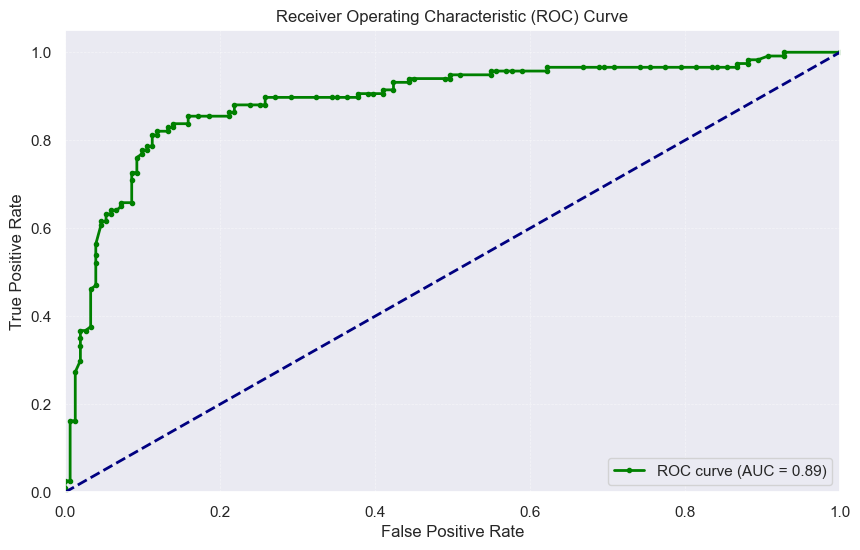

In [325]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

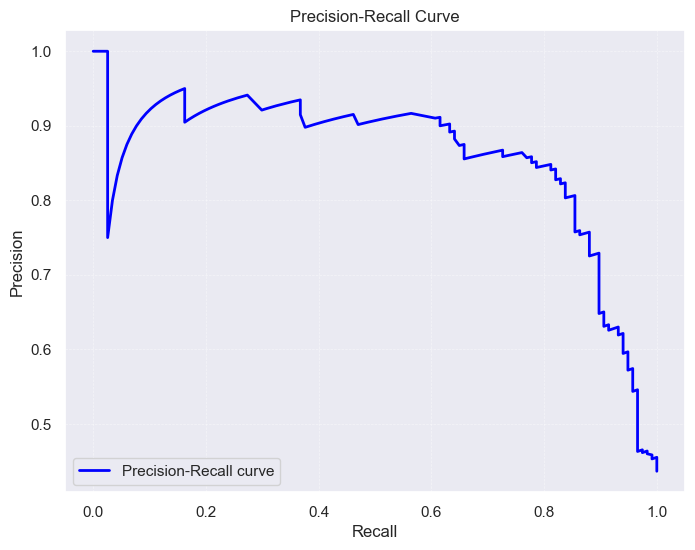

In [326]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

#### Predicting Sample

In [327]:
# Taking some sample data
sample_data = {'Pclass': [1, 2, 3], 'Sex': [0, 1, 0], 'Age': [10, 25, 40], 'SibSp': [0, 1, 6], 'Parch': [2, 3, 4], 'Fare': [8.0, 15.25, 53.10], 'Embarked': [0, 1, 2]}
sample_df = pd.DataFrame(sample_data)

# Making predictions using the best_model
sample_prediction = best_model.predict(sample_df)

# Print predictions
for i, predict in enumerate(sample_prediction):
    if predict == 0:
        print('Sample',i+1,'=>','Person not survived')
    else:
        print('Sample',i+1,'=>','Person Survived')

Sample 1 => Person not survived
Sample 2 => Person Survived
Sample 3 => Person not survived


#####  In analyzing the Titanic Survived dataset, I employed classification techniques within supervised learning, following the exploratory data analysis (EDA) process diligently. This involved initial steps such as removing duplicate records, exploring the relationship between the target variable and independent variables, and visualizing data through various graphs to discern underlying patterns. Additionally, I handled missing values using imputation techniques and transformed categorical data into numerical format using encoding methods. Furthermore, I enhanced model performance through hyperparameter tuning and evaluated the models using AUC ROC curve and precision curve. Ultimately, after splitting the data and assessing multiple models, gradient boosting emerged as the top-performing model with an accuracy of 83.58%. Leveraging this model, I made predictions on sample data, thus concluding a comprehensive analysis of survived prediction.